In [1]:
import pandas as pd
# load the dataset
df = pd.read_csv("../data/online_shoppers_intention.csv")

In [2]:
print(df.shape)
df.head()

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [4]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print(df[col].describe())
    print()

Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

Administrative_Duration
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64
count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.2

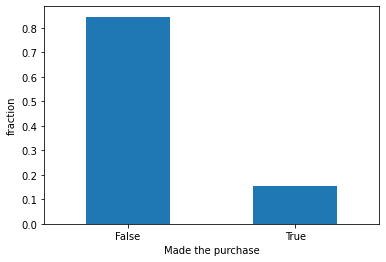

purchased count: 1908
not purchased count: 10422


In [5]:
# Visualize target variable 
import matplotlib
from matplotlib import pylab as plt
pd.value_counts(df["Revenue"],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.xlabel('Made the purchase')
plt.xticks(rotation=360)
plt.savefig("../figures/1column/Revenue", dpi = 300)
plt.show()
print("purchased count:",sum(df["Revenue"]==True))
print("not purchased count:", sum(df["Revenue"]==False))


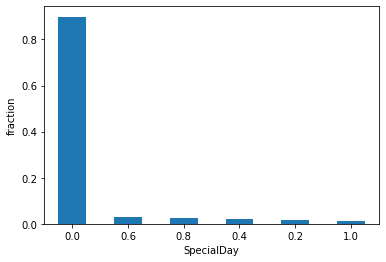

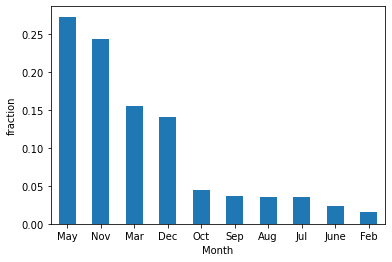

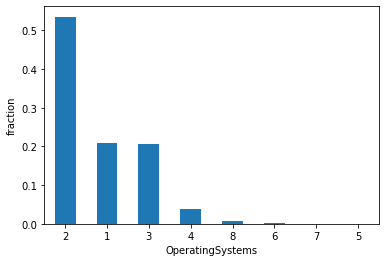

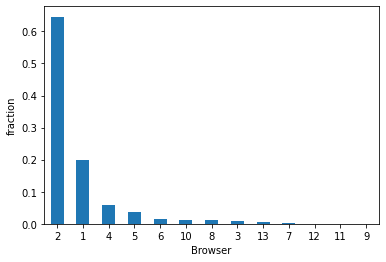

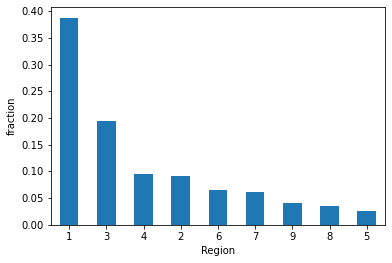

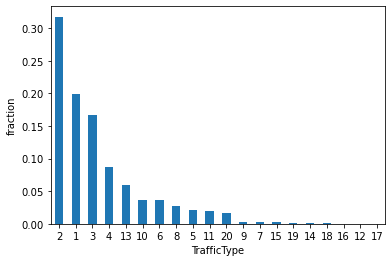

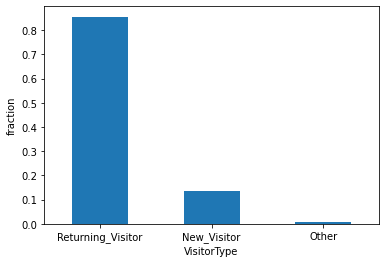

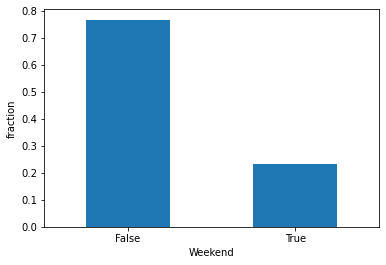

In [6]:
# visualize categorical variable 
for col in df.columns[9:-1]:
    pd.value_counts(df[col],normalize=True).plot.bar()
    plt.ylabel('fraction')
    plt.xlabel(col)
    plt.xticks(rotation=360)
    plt.savefig("../figures/1column/"+col, dpi = 300)
    plt.show()

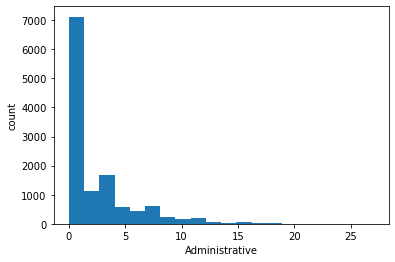

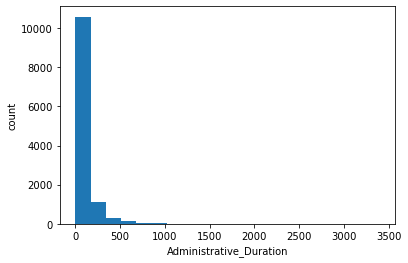

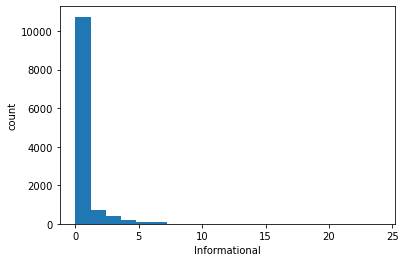

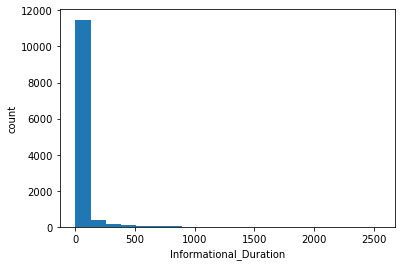

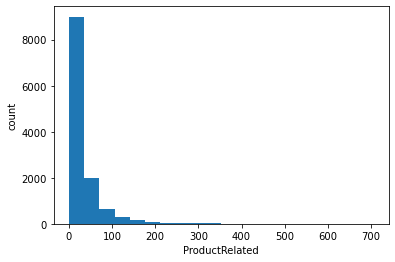

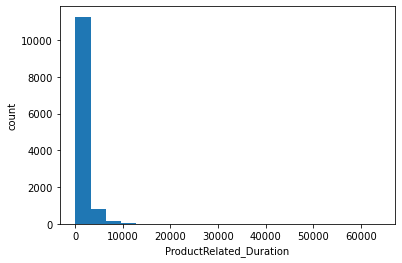

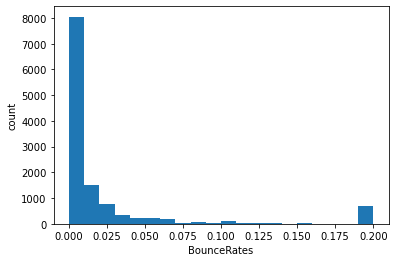

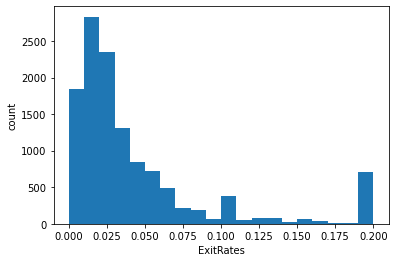

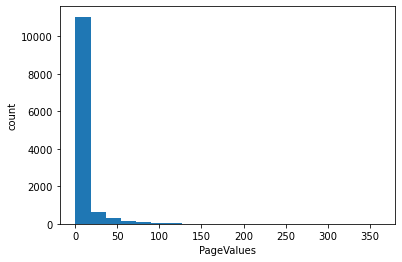

In [7]:
# visualize continuous variables 
for col in df.columns[0:9]:
    df[col].plot.hist(bins = 20)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.xticks(rotation=360)
    plt.savefig("../figures/1column/"+col, dpi = 300)
    plt.show()

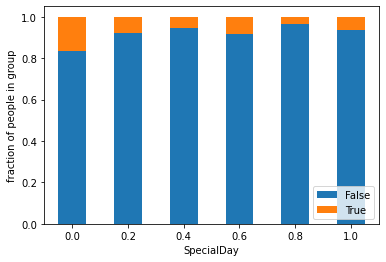

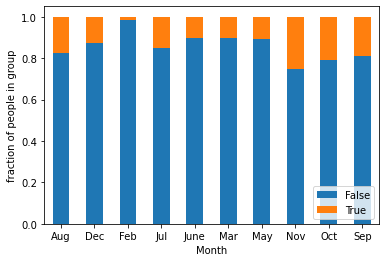

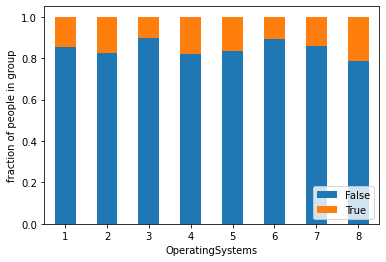

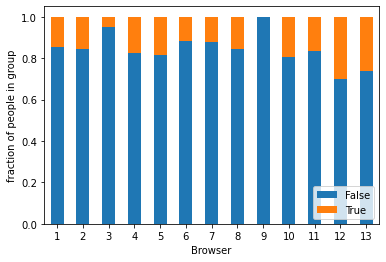

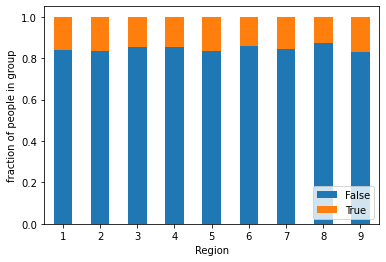

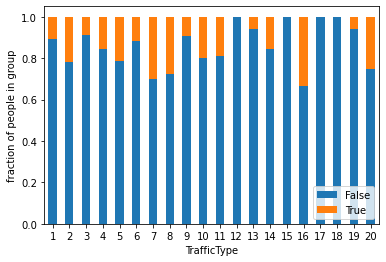

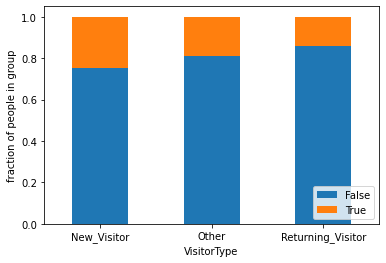

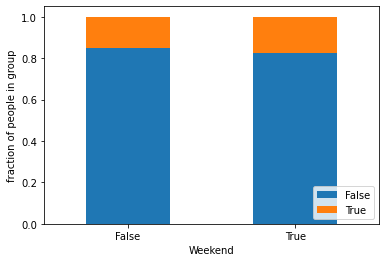

In [8]:

# plot categorical columns vs. target
for col in df.columns[9:-1]:
    count_matrix = df.groupby([col, "Revenue"]).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.ylabel('fraction of people in group')
    plt.xticks(rotation=360)
    plt.savefig("../figures/2columns/rev vs "+col, dpi = 300)
    plt.legend(loc=4)


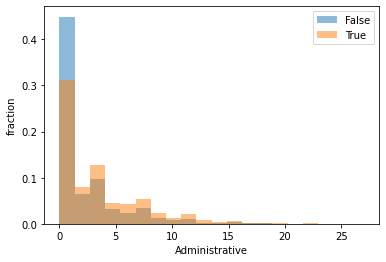

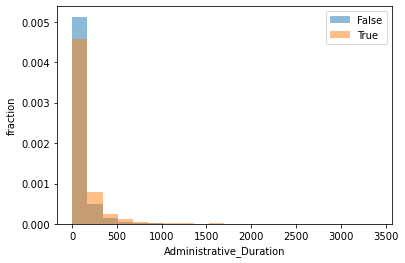

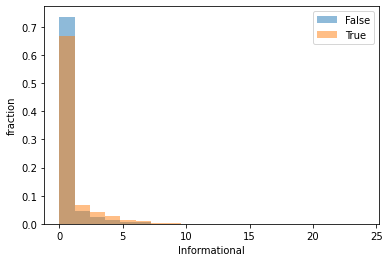

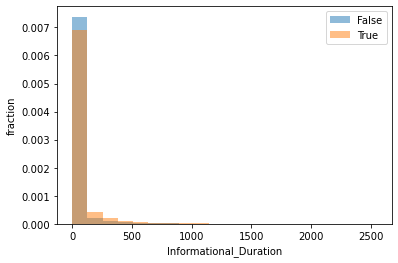

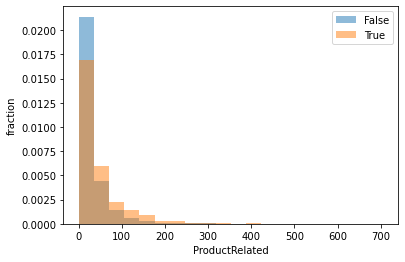

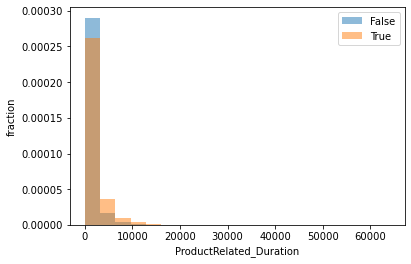

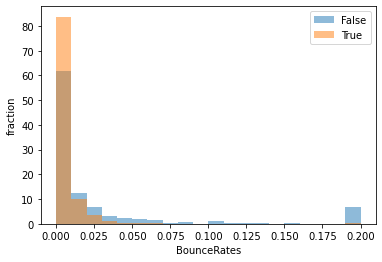

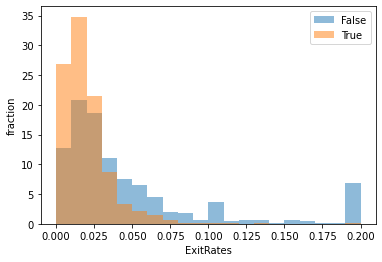

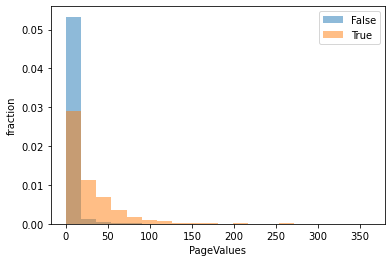

In [9]:
categories = df["Revenue"].unique()
# plot continuous columns vs. target
for col in df.columns[0:9]:
    for c in categories:
        bin_range = (df[col].min(),df[col].max())
        plt.hist(df[df["Revenue"]==c][col], alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    plt.legend()
    plt.ylabel('fraction')
    plt.xlabel(col)
    plt.savefig("../figures/2columns/rev vs "+col, dpi = 300)
    plt.show()

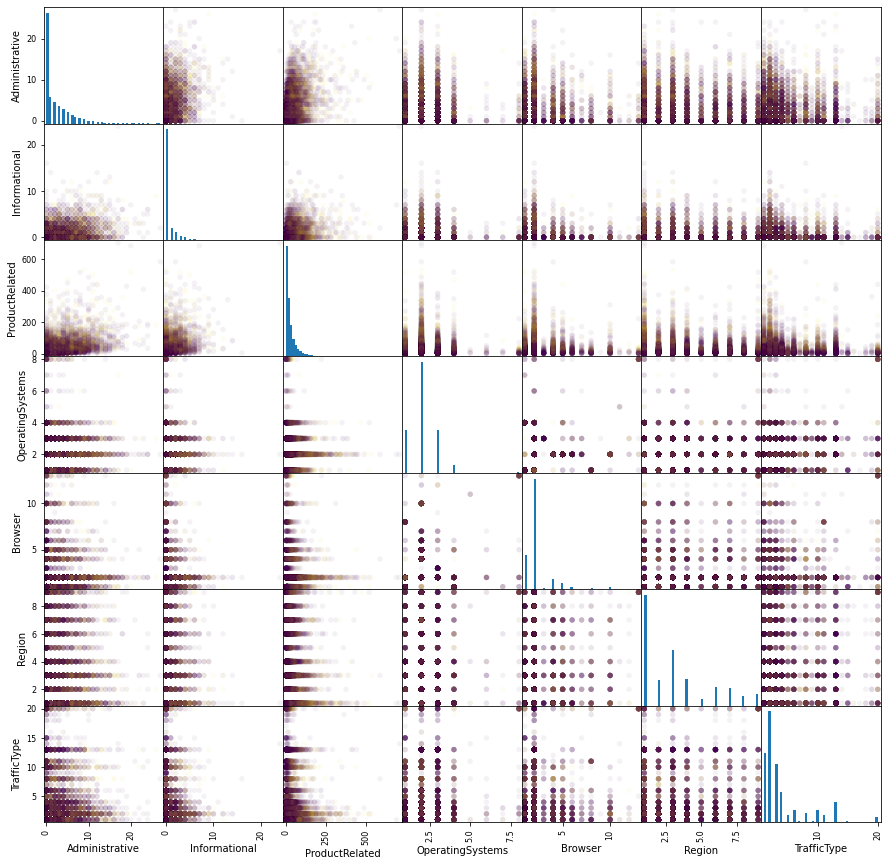

In [10]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(15, 15),c = pd.get_dummies(df['Revenue']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.05)
plt.show()

In [11]:
#separate the feature matrix X, and target variable y
X = df.loc[:, df.columns != 'Revenue']
y = df['Revenue']

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

# categorical variables
onehot_ftrs = ['SpecialDay', 'Month','OperatingSystems',
               'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend']
# continuous variables
std_ftrs = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']
# collect all the encoders
preprocessor = ColumnTransformer(transformers = [
    ("onehot",OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
    ("std", StandardScaler(),std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])

random_state = 42 
# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)


# do StratifiedKFold split on other

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
print(X_train_prep.shape)

    
    

(7892, 79)
